<a href="https://colab.research.google.com/github/nickbelomatis/nickbelomatis-colab_notebooks_collection/blob/main/tsne-grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!python --version

Python 3.7.13


In [36]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: ^C


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%matplotlib inline
import random
import numpy as np
import pickle
from PIL import Image
from scipy.spatial import distance
import igraph
import cv2
import os
from skimage import io
from sklearn.feature_extraction import image
from sklearn.manifold import TSNE
from tqdm import tqdm

In [27]:
data = []
folder = '/content/drive/MyDrive/data_test/'

for filename in tqdm((os.listdir(folder))):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (90,90))
        image = image.flatten()
        data.append([image, folder + filename])

100%|██████████| 80/80 [00:30<00:00,  2.65it/s]


In [6]:
features, images  = zip(*data)

In [7]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=80)
pca.fit(features)
pca_features = pca.transform(features)

In [8]:
num_images_to_plot = len(images)

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [9]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=350, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 1321.897820
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 69.4171982, gradient norm = 0.3461924 (50 iterations in 0.030s)
[t-SNE] Iteration 100: error = 71.3300171, gradient norm = 0.3998232 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 69.7562332, gradient norm = 0.2802509 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 66.4651794, gradient norm = 0.3055463 (50 iterations in 0.025s)
[t-SNE] Iteration 250: error = 69.0631104, gradient norm = 0.3131359 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.063110
[t-SNE] Iteration 300: error = 1.6271086, gradient norm = 0.0018777 (50 iterations in 0.024s)
[t-SNE] Iteration 350: error = 1.2910033, gradient norm = 0.0013021 (5

In [10]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

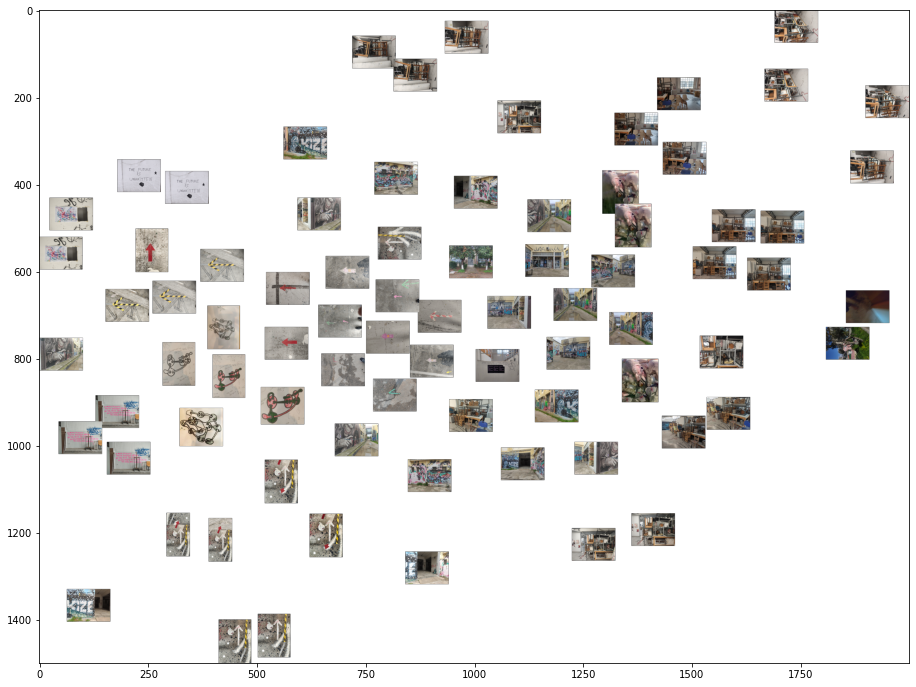

In [23]:
import matplotlib.pyplot
from matplotlib.pyplot import imshow

width = 2000
height = 1500
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [24]:
import os
import json

full_image.save("/content/drive/MyDrive/test_tSNE.png")

tsne_path = "/content/drive/MyDrive/test_tSNE.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(tsne_path, 'w') as outfile:
    json.dump(data, outfile)

print("saved t-SNE result to %s" % tsne_path)

saved t-SNE result to /content/drive/MyDrive/test_tSNE.json


In [14]:
!pip install git+https://github.com/Quasimondo/RasterFairy#egg=rasterfairy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Quasimondo/RasterFairy to /tmp/pip-install-9u4ckvmb/rasterfairy_11ea413d8dcf49fabfc6269060025187
  Running command git clone -q https://github.com/Quasimondo/RasterFairy /tmp/pip-install-9u4ckvmb/rasterfairy_11ea413d8dcf49fabfc6269060025187
  Created wheel for rasterfairy: filename=rasterfairy-1.0.4-py3-none-any.whl size=19612 sha256=452bd96b7aeeb2b8d1a84584784caa2237818783543796c21f2c1bc0200cf9ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-dta0le2x/wheels/f0/ec/d9/1f4cfec66053cdfdf86cf45e36758b180d7c72704490c84989
Successfully built rasterfairy
  Attempting uninstall: rasterfairy
    Found existing installation: rasterfairy 1.0.4
    Uninstalling rasterfairy-1.0.4:
      Successfully uninstalled rasterfairy-1.0.4


In [25]:
import rasterfairy
from rasterfairy import prime
nx = 40
ny = 40

grid_assignment = rasterfairy.transformPointCloud2D(tsne)

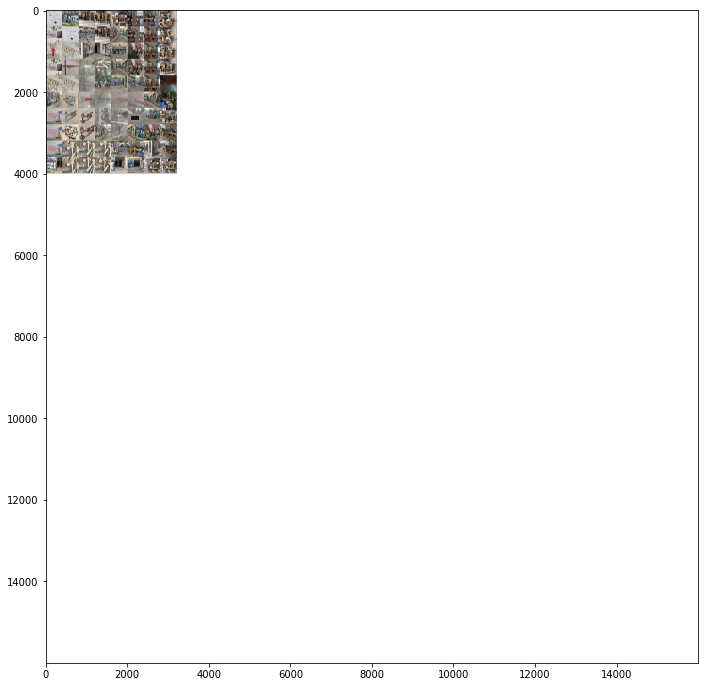

In [26]:
tile_width = 400    
tile_height = 400

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGBA', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [17]:
background = Image.new("RGB", grid_image.size, (255, 255, 255))
background.paste(grid_image, mask=grid_image.split()[3]) # 3 is the alpha channel

background.save('/content/drive/MyDrive/grid-tSNE.jpg', 'JPEG', quality=100)